### Importing libraries 

In [683]:
import pandas as pd
import seaborn as sns
import numpy as np
from dateutil import parser
import matplotlib.pyplot as plt

### Importing Data

In [684]:
df = pd.read_csv('data/ytdataframe.csv')

dff = pd.read_csv('data/ytunlabeled2.csv')


In [685]:
df.head(5)

,Unnamed: 0,video_id,channelTitle,title,description,tags,publishedAt,viewCount,likeCount,favouriteCount,commentCount,duration,definition,caption,subscribers,totalViews,totalVideos,avg polarity score,Label
0,0,-SejlHOXexc,Tech Tutorial,How to download facebook stories in your phone,Hey friends today we have another great topic ...,"['facebook stories in your phone', 'download f...",2019-11-02T14:25:35Z,969772,11114,NaN,338,PT3M55S,hd,False,140000,8679674,161,0.008202,non reputable
1,1,set4Kr8hX0w,Tech Tutorial,How to check whatsapp lastseen if hidden or bl...,Hello friends welcome to my channel Our today...,['How to check whatsapp lastseen if hidden or ...,2018-01-20T15:35:36Z,1480465,11945,NaN,860,PT4M44S,hd,False,140000,8679674,161,0.298687,non reputable
2,2,s4EYU1ptpIs,Tech Tutorial,How to change voice during call | Male female ...,Hey friends today we have another great topic ...,"['How to change voice during call', 'voice cha...",2021-11-30T17:37:11Z,553266,9277,NaN,335,PT5M21S,hd,False,140000,8679674,161,0.295888,non reputable
3,3,-lcPJAa6trw,Tech Tutorial,How to check who read my message in whatsapp g...,Hey friends today we have another great topic ...,['how to check who read message in whatsapp gr...,2018-05-07T15:12:51Z,324099,5371,NaN,266,PT3M,hd,False,140000,8679674,161,0.296792,non reputable
4,4,G1F6W7QhrWU,Tech Tutorial,How to Record Messenger calls -facebook messen...,Hey friends today we have another great topic ...,"['How to Record Messenger calls', 'facebook me...",2021-10-07T16:18:54Z,43140,327,NaN,23,PT4M23S,hd,False,140000,8679674,161,0.296837,non reputable


In [686]:
df.describe()

,Unnamed: 0,viewCount,likeCount,favouriteCount,commentCount,subscribers,totalViews,totalVideos,avg polarity score
count,160.000000,1.600000e+02,160.000000,0.0,160.000000,1.600000e+02,1.600000e+02,160.00000,160.000000
mean,79.500000,3.921978e+05,8944.556250,NaN,392.837500,6.775978e+05,4.409150e+07,4838.20000,0.338064
std,46.332134,9.824008e+05,21245.524519,NaN,824.083412,1.298546e+06,8.267774e+07,38076.02125,0.092491
min,0.000000,1.880000e+02,2.000000,NaN,0.000000,8.000000e+00,4.940000e+02,4.00000,0.000000
25%,39.750000,1.285625e+04,102.000000,NaN,18.750000,4.270000e+03,5.641192e+05,81.00000,0.316482
50%,79.500000,5.631750e+04,1315.000000,NaN,133.000000,1.400000e+05,8.679674e+06,218.00000,0.340861
75%,119.250000,2.704578e+05,8275.250000,NaN,360.750000,6.430000e+05,5.953507e+07,682.75000,0.342008
max,159.000000,8.147308e+06,146382.000000,NaN,5373.000000,6.130000e+06,4.108876e+08,342151.00000,0.865800


In [687]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 160 entries, 0 to 159
Data columns (total 19 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Unnamed: 0          160 non-null    int64  
 1   video_id            160 non-null    object 
 2   channelTitle        160 non-null    object 
 3   title               160 non-null    object 
 4   description         160 non-null    object 
 5   tags                145 non-null    object 
 6   publishedAt         160 non-null    object 
 7   viewCount           160 non-null    int64  
 8   likeCount           160 non-null    int64  
 9   favouriteCount      0 non-null      float64
 10  commentCount        160 non-null    int64  
 11  duration            160 non-null    object 
 12  definition          160 non-null    object 
 13  caption             160 non-null    bool   
 14  subscribers         160 non-null    int64  
 15  totalViews          160 non-null    int64  
 16  totalVid

# Data preprocessing 

Checking duplicates

In [688]:
df.duplicated().sum()


0

In [689]:
df = df.drop_duplicates()
df.shape

(160, 19)

Checking null values

In [690]:
df.isnull().sum()


Unnamed: 0              0
video_id                0
channelTitle            0
title                   0
description             0
tags                   15
publishedAt             0
viewCount               0
likeCount               0
favouriteCount        160
commentCount            0
duration                0
definition              0
caption                 0
subscribers             0
totalViews              0
totalVideos             0
avg polarity score      0
Label                   0
dtype: int64

Convert publish date to year

In [691]:
df['publishedAt'] = df['publishedAt'].apply(lambda x: parser.parse(x)) 
df['pushblishYear'] = df['publishedAt'].apply(lambda x: x.strftime("%Y"))

dff['publishedAt'] = dff['publishedAt'].apply(lambda x: parser.parse(x)) 
dff['pushblishYear'] = dff['publishedAt'].apply(lambda x: x.strftime("%Y"))

Convert count columns to numeric

In [692]:
numeric_cols = ['viewCount', 'likeCount', 'commentCount', 'pushblishYear']

df[numeric_cols] = df[numeric_cols].apply(pd.to_numeric, errors = 'coerce', axis = 1)

dff[numeric_cols] = dff[numeric_cols].apply(pd.to_numeric, errors = 'coerce', axis = 1)

Convert duration to seconds

In [693]:
import isodate
df['durationSecs'] = df['duration'].apply(lambda x: isodate.parse_duration(x))
df['durationSecs'] = df['durationSecs'].astype('timedelta64[s]')

dff['durationSecs'] = dff['duration'].apply(lambda x: isodate.parse_duration(x))
dff['durationSecs'] = dff['durationSecs'].astype('timedelta64[s]')

Add tag count

In [694]:


df['tagCount'] = df['tags'].apply(lambda x: 0 if x is np.nan else len(x))

dff['tagCount'] = dff['tags'].apply(lambda x: 0 if x is np.nan else len(x))

Add title and description length

In [695]:
df['title length'] = df['title'].apply(lambda x: 0 if x is np.nan else len(x))
df['description length'] = df['description'].apply(lambda x: 0 if x is np.nan else len(x))

dff['title length'] = dff['title'].apply(lambda x: 0 if x is np.nan else len(x))
dff['description length'] = dff['description'].apply(lambda x: 0 if x is np.nan else len(x))


In [696]:
new_cols = ["channelTitle","viewCount",'likeCount','definition','commentCount','caption','subscribers','totalViews','totalVideos','avg polarity score','pushblishYear','durationSecs','tagCount','title length','description length']
dff=dff[new_cols]
#or
dff=dff.reindex(columns=new_cols)

Dropping columns we wont use

In [697]:
df = df.drop(['Unnamed: 0', 'description', 'title', 'publishedAt', 'duration', 'favouriteCount', 'video_id', 'tags'], axis=1)



# EDA

### Label distribution 

reputable        100
non reputable     60
Name: Label, dtype: int64

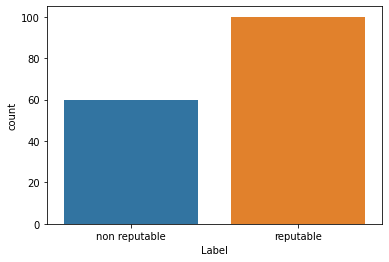

In [698]:
sns.countplot(x="Label", data=df)
df["Label"].value_counts()

Our data is unbalanced so we might need oversampling

In [699]:
# sns.scatterplot(x="commentCount", y="durationSecs", hue="Label", data = df)

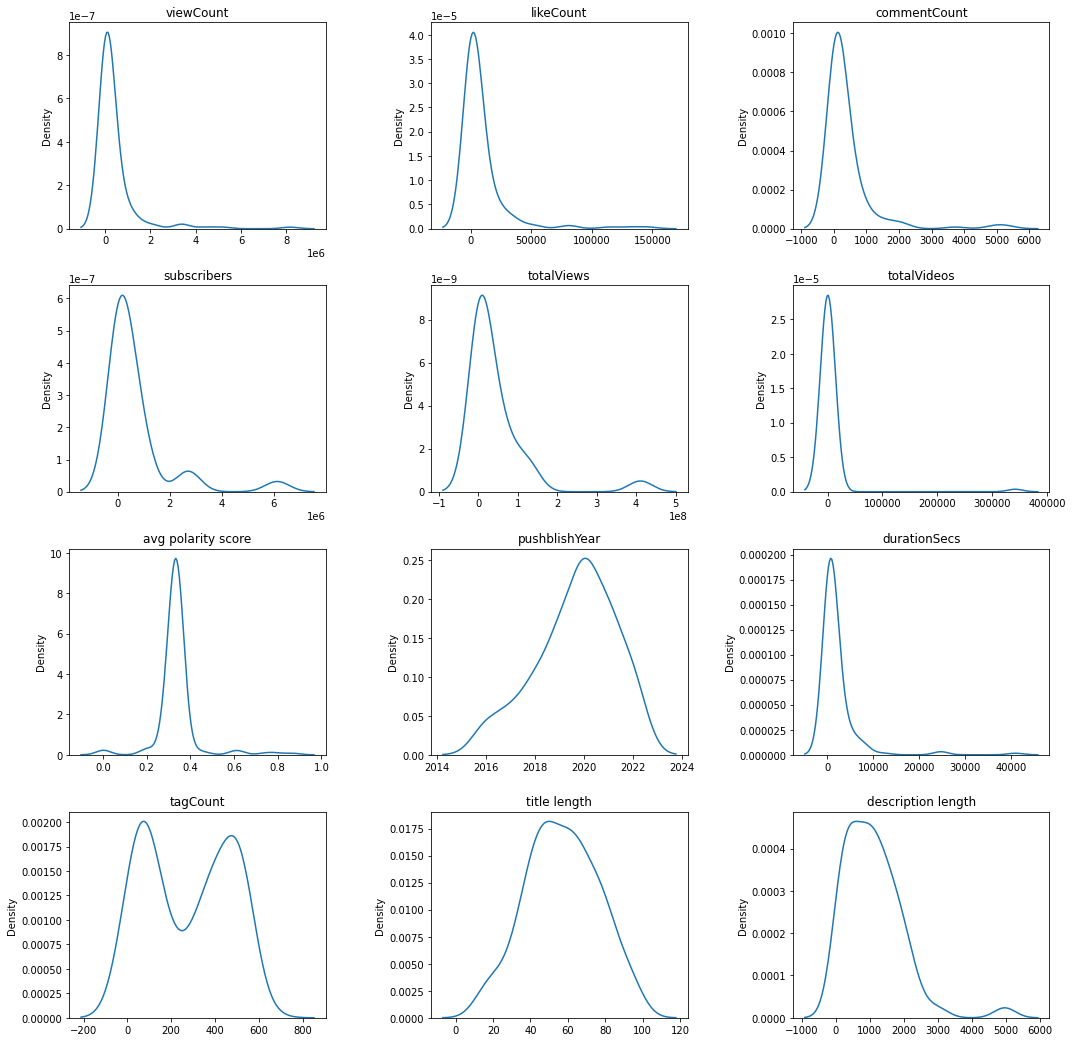

In [700]:
df_dist = df.select_dtypes([int,float]) 
fig = plt.figure(figsize=(15, 18)) 
try:
    for i,columns in enumerate(df_dist.columns, 1): 
        ax = plt.subplot(5,3,i) 
        sns.kdeplot(x=df_dist[columns])
        ax.set_xlabel(None) 
        ax.set_title(f'{columns}')
        plt.tight_layout(w_pad=3) 
except ValueError as ve:
    exit;      
plt.show()

# Modeling

In [701]:
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import LabelEncoder

Label encoding 

In [702]:
le = LabelEncoder()

df2 = ['channelTitle', 'definition', 'caption', 'Label']

df[df2] = df[df2].apply(le.fit_transform)

dffs = ['channelTitle', 'definition', 'caption']
dff[dffs] = dff[dffs].apply(le.fit_transform)



df.head(1)

,channelTitle,viewCount,likeCount,commentCount,definition,caption,subscribers,totalViews,totalVideos,avg polarity score,Label,pushblishYear,durationSecs,tagCount,title length,description length
0,24,969772,11114,338,0,0,140000,8679674,161,0.008202,0,2019,235.0,412,46,1193


<AxesSubplot:>

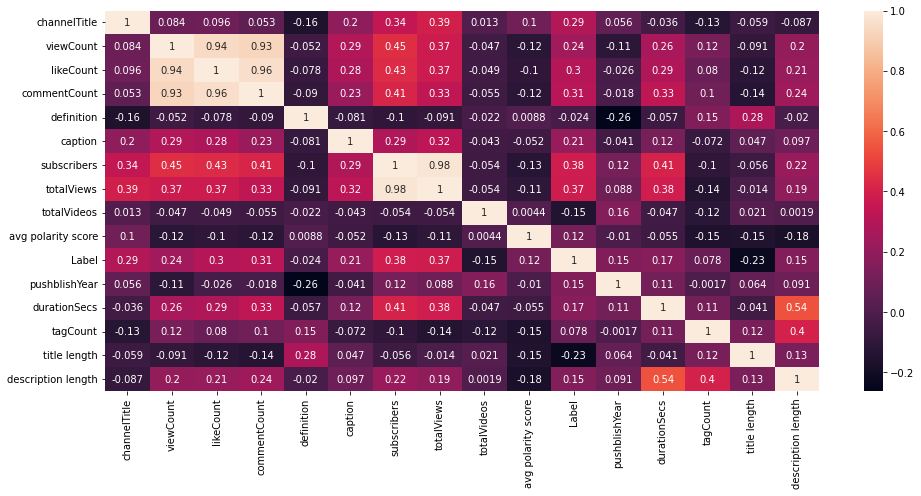

In [703]:
plt.figure(figsize=(16, 7))
sns.heatmap(df.corr(), annot = True)

Scaling

In [704]:
# from sklearn.preprocessing import StandardScaler
# scale = StandardScaler()

feat_col = ['channelTitle', 'viewCount', 'likeCount', 'definition', 'commentCount', 'caption', 'subscribers', 'totalViews', 'totalVideos', 'avg polarity score', 'pushblishYear', 'durationSecs', 'tagCount', 'description length', 'title length']

X = df[feat_col] # Features
y = df['Label']# Target variable


In [705]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=16)

In [706]:
# instantiate the model (using the default parameters)
logreg = LogisticRegression(random_state=16, max_iter=1000)

# fit the model with data
logreg.fit(X_train, y_train)

y_pred = logreg.predict(X_test)

In [707]:
from sklearn.metrics import classification_report
target_names = ['reputable', 'non reputable']
print(classification_report(y_test, y_pred, target_names=target_names))
print("Train Accuracy:",logreg.score(X_train, y_train))
print("Test Accuracy:",logreg.score(X_test, y_test))

               precision    recall  f1-score   support

    reputable       0.68      1.00      0.81        15
non reputable       1.00      0.72      0.84        25

     accuracy                           0.82        40
    macro avg       0.84      0.86      0.82        40
 weighted avg       0.88      0.82      0.83        40

Train Accuracy: 0.85
Test Accuracy: 0.825


In [708]:
from random import shuffle
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score

model = LogisticRegression(max_iter=1000)
cross_val = KFold(n_splits=3, random_state=16, shuffle=True)
scores = cross_val_score(model, X_train, y_train, cv=cross_val, scoring='roc_auc')
print("Mean AUC Score - Logistic Regression: ", scores.mean())

Mean AUC Score - Logistic Regression:  0.9131933709938824


# Testing different models

### Random Forest

In [709]:
from sklearn.ensemble import RandomForestClassifier
model1 = RandomForestClassifier()
kfold = KFold(n_splits=3, random_state=16, shuffle=True) 
scores = cross_val_score(model1, X_train, y_train, cv=kfold, scoring='roc_auc')
print("Mean AUC Score - Random Forest: ", scores.mean())

Mean AUC Score - Random Forest:  0.9583497278510067


In [710]:
# fit the model with data
model1.fit(X_train, y_train)

rf_pred = model1.predict(X_test)

print("Random Forest Train Accuracy:",model1.score(X_train, y_train))
print("Random Forest Test Accuracy:",model1.score(X_test, y_test))
target_names = ['reputable', 'non reputable']
print(classification_report(y_test, rf_pred, target_names=target_names))

Random Forest Train Accuracy: 1.0
Random Forest Test Accuracy: 0.975
               precision    recall  f1-score   support

    reputable       0.94      1.00      0.97        15
non reputable       1.00      0.96      0.98        25

     accuracy                           0.97        40
    macro avg       0.97      0.98      0.97        40
 weighted avg       0.98      0.97      0.98        40



### Decision Tree

In [711]:
from sklearn.tree import DecisionTreeClassifier
model2 = DecisionTreeClassifier()
cross_val = KFold(n_splits=3, random_state=16, shuffle=True)
scores = cross_val_score(model2, X_train, y_train, cv=cross_val, scoring='roc_auc')
print("Mean AUC Score - Decision Tree: ", scores.mean())

Mean AUC Score - Decision Tree:  0.8415165397262584


In [712]:
# fit the model with data
model2.fit(X_train, y_train)

dc_pred = model2.predict(X_test)

print("Decision Tree Train Accuracy:",model2.score(X_train, y_train))
print("Decision Tree Test Accuracy:",model2.score(X_test, y_test))
target_names = ['reputable', 'non reputable']
print(classification_report(y_test, dc_pred, target_names=target_names))


Decision Tree Train Accuracy: 1.0
Decision Tree Test Accuracy: 0.925
               precision    recall  f1-score   support

    reputable       0.88      0.93      0.90        15
non reputable       0.96      0.92      0.94        25

     accuracy                           0.93        40
    macro avg       0.92      0.93      0.92        40
 weighted avg       0.93      0.93      0.93        40



### XGBClassifier

In [713]:
from xgboost import XGBClassifier
model4 = XGBClassifier()
cross_val = KFold(n_splits=3, random_state=16, shuffle=True)
scores = cross_val_score(model4, X_train, y_train, cv=cross_val, scoring='roc_auc')
print("Mean AUC Score - Gaussian Naive Bayes: ", scores.mean())

Mean AUC Score - Gaussian Naive Bayes:  0.9361831689197418


In [714]:
# fit the model with data
model4.fit(X_train, y_train)

xgb_pred = model4.predict(X_test)

print("XGB Train Accuracy:",model4.score(X_train, y_train))
print("XGB Test Accuracy:",model4.score(X_test, y_test))
target_names = ['reputable', 'non reputable']
print(classification_report(y_test, xgb_pred, target_names=target_names))

XGB Train Accuracy: 1.0
XGB Test Accuracy: 0.975
               precision    recall  f1-score   support

    reputable       0.94      1.00      0.97        15
non reputable       1.00      0.96      0.98        25

     accuracy                           0.97        40
    macro avg       0.97      0.98      0.97        40
 weighted avg       0.98      0.97      0.98        40



### K-Nearest Neighbors

In [715]:
from sklearn.neighbors import KNeighborsClassifier
model5 = KNeighborsClassifier()
cross_val = KFold(n_splits=3, random_state=16, shuffle=True)
scores = cross_val_score(model5, X_train, y_train, cv=cross_val, scoring='roc_auc')
print("Mean AUC Score - K-Nearest Neighbors: ", scores.mean())

Mean AUC Score - K-Nearest Neighbors:  0.8858660521064613


In [716]:
# fit the model with data
model5.fit(X_train, y_train)

k_pred = model5.predict(X_test)

print("KNN Train Accuracy:",model5.score(X_train, y_train))
print("KNN Test Accuracy:",model5.score(X_test, y_test))

KNN Train Accuracy: 0.9333333333333333
KNN Test Accuracy: 0.925


In [717]:
from sklearn.metrics import classification_report

target_names = ['reputable', 'non reputable']
print(classification_report(y_test, k_pred, target_names=target_names))

               precision    recall  f1-score   support

    reputable       0.88      0.93      0.90        15
non reputable       0.96      0.92      0.94        25

     accuracy                           0.93        40
    macro avg       0.92      0.93      0.92        40
 weighted avg       0.93      0.93      0.93        40



From the 5 scores above the top 3 performers were Logistic Regression,XGBClassifier and K-Neasrest Neighbors. We will move ahead and fine tune them.

# Hyper parameters tuning

In [718]:
from sklearn.model_selection import GridSearchCV
tuned_parameters = [{'C': np.linspace(.0001, 1000, 200) , 'penalty': ["l2"]}]
clf = GridSearchCV(logreg, tuned_parameters, cv=cross_val, scoring= 'roc_auc')
clf.fit(X_train, y_train)

print("Best parameters set found on development set:")
print()
print(clf.best_params_)
print("\nOptimized model achieved an ROC of:", round(clf.score(X_train, y_train), 4))
print("LogReg Train Accuracy:",clf.score(X_train, y_train))
print("LogReg Test Accuracy:",clf.score(X_test, y_test))

Best parameters set found on development set:

{'C': 0.0001, 'penalty': 'l2'}

Optimized model achieved an ROC of: 0.9419
LogReg Train Accuracy: 0.941925925925926
LogReg Test Accuracy: 0.9413333333333332


# Save model

In [719]:
import pickle

pickle.dump(clf, open('LogRegModelInitial', 'wb'))

# Labelling data using our model

In [720]:
dff.head()

,channelTitle,viewCount,likeCount,definition,commentCount,caption,subscribers,totalViews,totalVideos,avg polarity score,pushblishYear,durationSecs,tagCount,title length,description length
0,9,1410150,18797,0,76,1,369000,20517888,1850,0.277473,2020,4520.0,142,76,1043
1,9,561083,6564,0,31,1,369000,20517888,1850,0.234844,2020,4697.0,160,100,389
2,9,264242,2629,0,10,1,369000,20517888,1850,0.236257,2020,4774.0,50,99,324
3,9,129002,1091,0,3,1,369000,20517888,1850,0.237893,2020,4922.0,73,98,293
4,9,125920,1291,0,8,1,369000,20517888,1850,0.244639,2020,4732.0,86,88,324


Labeling

In [721]:
new_pred = clf.predict(dff)
print(new_pred)

[0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 0 0 0 1 1 0 0 0 1 1 1 1 0 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1]


c:\Python310\lib\site-packages\sklearn\base.py:493: FutureWarning: The feature names should match those that were passed during fit. Starting version 1.2, an error will be raised.
Feature names must be in the same order as they were in fit.

  warnings.warn(message, FutureWarning)


Assigning the labels

In [722]:
dffs = pd.read_csv('data/ytunlabeled2.csv')

dffs['Label'] = None

dffs = dffs.assign(Label = new_pred)

dffs.to_csv(r'data/ytlabeled.csv')